In [3]:
import pandas as pd
import seaborn as sns
sns.set(style="white")
import numpy as np
import matplotlib.pyplot as plt

#Realizo o tratamento da tabela para substituir todos os valores diferentes de 0 por 1, já que alguns dos valores 1 continham comentários ao lado e precisam ser substituídos apenas pelo valor 1
tabela_relatorios = pd.read_csv("relatorios.csv", keep_default_na=False ,sep = ",", header = 0, encoding = 'utf8')
tabela_relatorios.loc[tabela_relatorios["a. Questões de Auditoria"] != 0, "a. Questões de Auditoria"] = 1
tabela_relatorios.loc[tabela_relatorios["b. Subquestões de Auditoria"] != 0, "b. Subquestões de Auditoria"] = 1
tabela_relatorios.loc[tabela_relatorios["c. Descrição sumária"] != 0, "c. Descrição sumária"] = 1
tabela_relatorios.loc[tabela_relatorios["d. Critério (O que deveria ser)"] != 0, "d. Critério (O que deveria ser)"] = 1
tabela_relatorios.loc[tabela_relatorios["e. Condição ou situação encontrada (O que é) [achados]"] != 0, "e. Condição ou situação encontrada (O que é) [achados]"] = 1
tabela_relatorios.loc[tabela_relatorios["f. Evidências"] != "0", "f. Evidências"] = 1
tabela_relatorios.loc[tabela_relatorios["g. Informação extraída das evidências"] != 0, "g. Informação extraída das evidências"] = 1
tabela_relatorios.loc[tabela_relatorios["h. Causas"] != 0, "h. Causas"] = 1
tabela_relatorios.loc[tabela_relatorios["i. Efeitos"] != 0, "i. Efeitos"] = 1
tabela_relatorios.loc[tabela_relatorios["j. Boas Práticas"] != 0, "j. Boas Práticas"] = 1
tabela_relatorios.loc[tabela_relatorios["k. Recomendações"] != 0, "k. Recomendações"] = 1
tabela_relatorios.loc[tabela_relatorios["l. Benefícios esperados"] != 0, "l. Benefícios esperados"] = 1
tabela_relatorios.loc[tabela_relatorios["m. Manifestação"] != 0, "m. Manifestação"] = 1
tabela_relatorios.loc[tabela_relatorios["n. Conclusões"] != 0, "n. Conclusões"] = 1

tabela_relatorios.loc[tabela_relatorios["n. Conclusões"] != 0, "n. Conclusões"] = 1

#Mostro as primeiras 10 linhas da tabela para saber se ficou tudo OK
display(tabela_relatorios.head(10))

,Título,Serviço,Grupo,Ação,Avaliação,Publicação,Localidade,Matriz de Achados?,a. Questões de Auditoria,b. Subquestões de Auditoria,...,e. Condição ou situação encontrada (O que é) [achados],f. Evidências,g. Informação extraída das evidências,h. Causas,i. Efeitos,j. Boas Práticas,k. Recomendações,l. Benefícios esperados,m. Manifestação,n. Conclusões
0,Relatório 201900989 - Aplicação de recursos fe...,Avaliação,Outros,Auditoria Interna Governamental,Sim,26/06/2024,Aracaju/SE,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,"Relatório 1594386 - Aquisição de caminhões, tr...",Avaliação,Análise de Alertas de Licitações,Auditoria Interna Governamental,Sim,21/06/2024,Brasília/DF,0,0,0,...,1,1,0,0,0,0,1,0,0,1
2,Relatório 1557120 - Licitações realizadas pela...,Avaliação,Análise de Alertas de Licitações,Auditoria Interna Governamental,Não,18/06/2024,"Porto Velho/RO, Belém/PA, Natal/RN, João Pesso...",0,0,0,...,1,1,0,1,0,0,1,0,0,1
3,Relatório 1354457 - Obra de reforma no Hospita...,Apuração,,Auditoria Interna Governamental,Não,17/06/2024,Rio de Janeiro/RJ,0,0,0,...,1,1,0,0,0,0,1,1,1,1
4,Relatório 1110378 - Aquisição de insumos pelo ...,Avaliação,Outros,Auditoria Interna Governamental,Não,17/06/2024,Rio de Janeiro/RJ,0,0,0,...,1,1,1,0,1,0,1,0,1,1
5,Relatório 1373589 - Governança e gestão de aqu...,Avaliação,Outros,Auditoria Interna Governamental,Não,17/06/2024,Rio de Janeiro,0,1,0,...,1,1,0,1,0,0,1,1,0,1
6,Relatório 1110439 - Contratação de serviços té...,Avaliação,Outros,Auditoria Interna Governamental,Não,17/06/2024,Rio de Janeiro/RJ,0,1,0,...,1,1,0,0,1,0,1,0,0,1
7,Relatório 1545070 - Aquisição de medicamentos ...,Apuração,Outros,Auditoria Interna Governamental,Não,17/06/2024,Rio de Janeiro/RJ,0,0,0,...,1,1,0,1,0,0,1,0,0,0
8,Relatório 1198288 - Aquisição de insumos pelo ...,Avaliação,Outros,Auditoria Interna Governamental,Não,17/06/2024,Rio de Janeiro/RJ,0,1,0,...,1,1,0,1,0,0,0,0,0,1
9,Relatório 1609472 - Aquisição de medicamentos ...,Avaliação,Análise de Alertas de Licitações,Auditoria Interna Governamental,Não,17/06/2024,Rio de Janeiro/RJ,0,0,0,...,0,1,0,0,0,0,1,0,0,1


### 1. Casos por Unidade da Federação

In [4]:
#Tabela apenas com os relatórios do Acre
tabela_acre_bool = tabela_relatorios['Localidade'].str.contains("AC", case=True, na=False) #booleano categoriza apenas quando é do Acre
tabela_acre = tabela_relatorios[tabela_acre_bool]
tabela_acre_count = len(tabela_acre.index)
#display(tabela_acre_count)
#display(tabela_acre.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Alagoas
tabela_alagoas_bool = tabela_relatorios['Localidade'].str.contains("AL", case=True, na=False) #booleano categoriza apenas quando é do Alagoas
tabela_alagoas = tabela_relatorios[tabela_alagoas_bool]
tabela_alagoas_count = len(tabela_alagoas.index)
#display(tabela_alagoas_count)
#display(tabela_alagoas.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Amazonas
tabela_amazonas_bool = tabela_relatorios['Localidade'].str.contains("AM", case=True, na=False) #booleano categoriza apenas quando é do Amazonas
tabela_amazonas = tabela_relatorios[tabela_amazonas_bool]
tabela_amazonas_count = len(tabela_amazonas.index)
#display(tabela_amazonas_count)
#display(tabela_amazonas.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Amapá
tabela_amapa_bool = tabela_relatorios['Localidade'].str.contains("AP", case=True, na=False) #booleano categoriza apenas quando é do Amapá
tabela_amapa = tabela_relatorios[tabela_amapa_bool]
tabela_amapa_count = len(tabela_amapa.index)
#display(tabela_amapa_count)
#display(tabela_amapa.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios da Bahia
tabela_bahia_bool = tabela_relatorios['Localidade'].str.contains("BA", case=True, na=False) #booleano categoriza apenas quando é da Bahia
tabela_bahia = tabela_relatorios[tabela_bahia_bool]
tabela_bahia_count = len(tabela_bahia.index)
#display(tabela_bahia_count)
#display(tabela_bahia.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Ceará
tabela_ceara_bool = tabela_relatorios['Localidade'].str.contains("CE", case=True, na=False) #booleano categoriza apenas quando é do Ceará
tabela_ceara = tabela_relatorios[tabela_ceara_bool]
tabela_ceara_count = len(tabela_ceara.index)
#display(tabela_ceara_count)
#display(tabela_ceara.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Distrito Federal
tabela_df_bool = tabela_relatorios['Localidade'].str.contains("DF", case=True, na=False) #booleano categoriza apenas quando é do Distrito Federal
tabela_df = tabela_relatorios[tabela_df_bool]
tabela_df_count = len(tabela_df.index)
#display(tabela_df_count)
#display(tabela_df.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Espírito Santo
tabela_es_bool = tabela_relatorios['Localidade'].str.contains("ES", case=True, na=False) #booleano categoriza apenas quando é do Espírito Santo
tabela_es = tabela_relatorios[tabela_es_bool]
tabela_es_count = len(tabela_es.index)
#display(tabela_es_count)
#display(tabela_es.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Goiás
tabela_goias_bool = tabela_relatorios['Localidade'].str.contains("GO", case=True, na=False) #booleano categoriza apenas quando é de Goiás
tabela_goias = tabela_relatorios[tabela_goias_bool]
tabela_goias_count = len(tabela_goias.index)
#display(tabela_goias_count)
#display(tabela_goias.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Maranhão
tabela_maranhao_bool = tabela_relatorios['Localidade'].str.contains("MA", case=True, na=False) #booleano categoriza apenas quando é do Maranhão
tabela_maranhao = tabela_relatorios[tabela_maranhao_bool]
tabela_maranhao_count = len(tabela_maranhao.index)
#display(tabela_maranhao_count)
#display(tabela_maranhao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Minas Gerais
tabela_mg_bool = tabela_relatorios['Localidade'].str.contains("MG", case=True, na=False) #booleano categoriza apenas quando é de Minas Gerais
tabela_mg = tabela_relatorios[tabela_mg_bool]
tabela_mg_count = len(tabela_mg.index)
#display(tabela_mg_count)
#display(tabela_mg.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Mato Grosso do Sul
tabela_ms_bool = tabela_relatorios['Localidade'].str.contains("MS", case=True, na=False) #booleano categoriza apenas quando é do Mato Grosso do Sul
tabela_ms = tabela_relatorios[tabela_ms_bool]
tabela_ms_count = len(tabela_ms.index)
#display(tabela_ms_count)
#display(tabela_ms.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Mato Grosso
tabela_mt_bool = tabela_relatorios['Localidade'].str.contains("MT", case=True, na=False) #booleano categoriza apenas quando é do Mato Grosso
tabela_mt = tabela_relatorios[tabela_mt_bool]
tabela_mt_count = len(tabela_mt.index)
#display(tabela_mt_count)
#display(tabela_mt.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Pará
tabela_para_bool = tabela_relatorios['Localidade'].str.contains("PA", case=True, na=False) #booleano categoriza apenas quando é do Pará
tabela_para = tabela_relatorios[tabela_para_bool]
tabela_para_count = len(tabela_para.index)
#display(tabela_para_count)
#display(tabela_para.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios da Paraíba
tabela_paraiba_bool = tabela_relatorios['Localidade'].str.contains("PB", case=True, na=False) #booleano categoriza apenas quando é da Paraíba
tabela_paraiba = tabela_relatorios[tabela_paraiba_bool]
tabela_paraiba_count = len(tabela_paraiba.index)
#display(tabela_paraiba_count)
#display(tabela_paraiba.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Pernambuco
tabela_pernambuco_bool = tabela_relatorios['Localidade'].str.contains("PE", case=True, na=False) #booleano categoriza apenas quando é de Pernambuco
tabela_pernambuco = tabela_relatorios[tabela_pernambuco_bool]
tabela_pernambuco_count = len(tabela_pernambuco.index)
#display(tabela_pernambuco_count)
#display(tabela_pernambuco.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Piauí
tabela_piaui_bool = tabela_relatorios['Localidade'].str.contains("PI", case=True, na=False) #booleano categoriza apenas quando é do Piauí
tabela_piaui = tabela_relatorios[tabela_piaui_bool]
tabela_piaui_count = len(tabela_piaui.index)
#display(tabela_piaui_count)
#display(tabela_piaui.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Paraná
tabela_parana_bool = tabela_relatorios['Localidade'].str.contains("PR", case=True, na=False) #booleano categoriza apenas quando é do Paraná
tabela_parana = tabela_relatorios[tabela_parana_bool]
tabela_parana_count = len(tabela_parana.index)
#display(tabela_parana_count)
#display(tabela_parana.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Rio de Janeiro
tabela_rj_bool = tabela_relatorios['Localidade'].str.contains("RJ", case=True, na=False) #booleano categoriza apenas quando é do Rio de Janeiro
tabela_rj = tabela_relatorios[tabela_rj_bool]
tabela_rj_count = len(tabela_rj.index)
#display(tabela_rj_count)
#display(tabela_rj.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Rio Grande do Norte
tabela_rn_bool = tabela_relatorios['Localidade'].str.contains("RN", case=True, na=False) #booleano categoriza apenas quando é do Rio Grande do Norte
tabela_rn = tabela_relatorios[tabela_rn_bool]
tabela_rn_count = len(tabela_rn.index)
#display(tabela_rn_count)
#display(tabela_rn.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do Rio Grande do Sul
tabela_rs_bool = tabela_relatorios['Localidade'].str.contains("RS", case=True, na=False) #booleano categoriza apenas quando é do Rio Grande do Sul
tabela_rs = tabela_relatorios[tabela_rs_bool]
tabela_rs_count = len(tabela_rs.index)
#display(tabela_rs_count)
#display(tabela_rs.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Rondônia
tabela_rondonia_bool = tabela_relatorios['Localidade'].str.contains("RO", case=True, na=False) #booleano categoriza apenas quando é de Rondônia
tabela_rondonia = tabela_relatorios[tabela_rondonia_bool]
tabela_rondonia_count = len(tabela_rondonia.index)
#display(tabela_rondonia_count)
#display(tabela_rondonia.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Roraima
tabela_roraima_bool = tabela_relatorios['Localidade'].str.contains("RR", case=True, na=False) #booleano categoriza apenas quando é de Roraima
tabela_roraima = tabela_relatorios[tabela_roraima_bool]
tabela_roraima_count = len(tabela_roraima.index)
#display(tabela_roraima_count)
#display(tabela_roraima.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Santa Catarina
tabela_sc_bool = tabela_relatorios['Localidade'].str.contains("SC", case=True, na=False) #booleano categoriza apenas quando é de Santa Catarina
tabela_sc = tabela_relatorios[tabela_sc_bool]
tabela_sc_count = len(tabela_sc.index)
#display(tabela_sc_count)
#display(tabela_sc.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Sergipe
tabela_sergipe_bool = tabela_relatorios['Localidade'].str.contains("SE", case=True, na=False) #booleano categoriza apenas quando é de Sergipe
tabela_sergipe = tabela_relatorios[tabela_sergipe_bool]
tabela_sergipe_count = len(tabela_sergipe.index)
#display(tabela_sergipe_count)
#display(tabela_sergipe.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de São Paulo
tabela_sp_bool = tabela_relatorios['Localidade'].str.contains("SP", case=True, na=False) #booleano categoriza apenas quando é de São Paulo
tabela_sp = tabela_relatorios[tabela_sp_bool]
tabela_sp_count = len(tabela_sp.index)
#display(tabela_sp_count)
#display(tabela_sp.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios de Tocantins
tabela_tocantins_bool = tabela_relatorios['Localidade'].str.contains("TO", case=True, na=False) #booleano categoriza apenas quando é de Tocantins
tabela_tocantins = tabela_relatorios[tabela_tocantins_bool]
tabela_tocantins_count = len(tabela_tocantins.index)
#display(tabela_tocantins_count)
#display(tabela_tocantins.head(10)) #Exibe amostra da tabela para saber se está tudo ok

qtd_total_relatórios = len(tabela_relatorios.index) #Número total de relatórios
# Lista contendo a lista de estados
array_estados = ["Acre", "Alagoas", "Amazonas", "Amapá", "Bahia", "Ceará", "Distrito Federal", "Espírito Santo", "Goiás", "Maranhão", "Minas Gerais", "Mato Grosso do Sul", "Mato Grosso", "Pará", "Paraíba", "Pernambuco", "Piauí", "Paraná", "Rio de Janeiro", "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima", "Santa Catarina", "Sergipe", "São Paulo", "Tocantins"]
#Lista contendo a quantidade de relatórios por estado
array_quantidades_estados = [tabela_acre_count, tabela_alagoas_count, tabela_amazonas_count, tabela_amapa_count, tabela_bahia_count, tabela_ceara_count, tabela_df_count, tabela_es_count, tabela_goias_count, tabela_maranhao_count, tabela_mg_count, tabela_ms_count, tabela_mt_count, tabela_para_count, tabela_paraiba_count, tabela_pernambuco_count, tabela_piaui_count, tabela_parana_count, tabela_rj_count, tabela_rn_count, tabela_rs_count, tabela_rondonia_count, tabela_roraima_count, tabela_sc_count, tabela_sergipe_count, tabela_sp_count, tabela_tocantins_count]
#Lista contendo a porcentagem de relatórios por estado
array_porcentagens_estados = [round(((tabela_acre_count/qtd_total_relatórios)*100), 2), round(((tabela_alagoas_count/qtd_total_relatórios)*100), 2), round(((tabela_amazonas_count/qtd_total_relatórios)*100), 2), round(((tabela_amapa_count/qtd_total_relatórios)*100), 2), round(((tabela_bahia_count/qtd_total_relatórios)*100), 2), round(((tabela_ceara_count/qtd_total_relatórios)*100), 2), round(((tabela_df_count/qtd_total_relatórios)*100), 2), round(((tabela_es_count/qtd_total_relatórios)*100), 2), round(((tabela_goias_count/qtd_total_relatórios)*100),2), round(((tabela_maranhao_count/qtd_total_relatórios)*100),2), round(((tabela_mg_count/qtd_total_relatórios)*100), 2), round(((tabela_ms_count/qtd_total_relatórios)*100), 2), round(((tabela_mt_count/qtd_total_relatórios)*100), 2), round(((tabela_para_count/qtd_total_relatórios)*100), 2), round(((tabela_paraiba_count/qtd_total_relatórios)*100), 2), round(((tabela_pernambuco_count/qtd_total_relatórios)*100), 2), round(((tabela_piaui_count/qtd_total_relatórios)*100), 2), round(((tabela_parana_count/qtd_total_relatórios)*100), 2), round(((tabela_rj_count/qtd_total_relatórios)*100), 2), round(((tabela_rn_count/qtd_total_relatórios)*100), 2), round(((tabela_rs_count/qtd_total_relatórios)*100), 2), round(((tabela_rondonia_count/qtd_total_relatórios)*100), 2), round(((tabela_roraima_count/qtd_total_relatórios)*100), 2), round(((tabela_sc_count/qtd_total_relatórios)*100), 2), round(((tabela_sergipe_count/qtd_total_relatórios)*100), 2), round(((tabela_sp_count/qtd_total_relatórios)*100), 2), round(((tabela_tocantins_count/qtd_total_relatórios)*100), 2)]

#Tabela que mostra a porcentagem de relatórios por estado e sua quantidade
tabela_porcentagem_estado = pd.DataFrame({'Estado': array_estados+["Total"], 'Quantidade de relatórios': array_quantidades_estados+[qtd_total_relatórios], 'Porcentagem (%)': array_porcentagens_estados+["100"]})

tabela_porcentagem_estado.to_excel('casos_por_estado.xlsx')

display(tabela_porcentagem_estado)

,Estado,Quantidade de relatórios,Porcentagem (%)
0,Acre,17,1.04
1,Alagoas,16,0.98
2,Amazonas,11,0.67
3,Amapá,20,1.22
4,Bahia,76,4.65
5,Ceará,54,3.3
6,Distrito Federal,398,24.33
7,Espírito Santo,21,1.28
8,Goiás,60,3.67
9,Maranhão,21,1.28


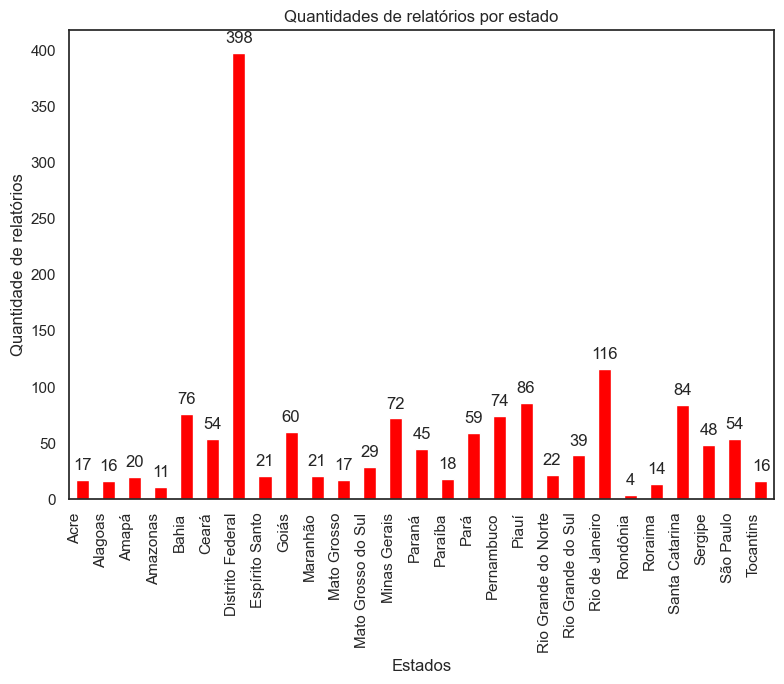

In [5]:
#Removendo a barra que representa o total de relatórios do dataset
tabela_filtrada = tabela_porcentagem_estado[tabela_porcentagem_estado['Estado'] != 'Total']

#Selecionando os dados que serão apresentados no gráfico
grafico_estado_relatorio = tabela_filtrada.groupby('Estado')['Quantidade de relatórios'].mean()

#decidindo o tamanho do gráfico
plt.figure(figsize=(8, 7))

#ajustando o modelo do gráfico, cor das barras, título e nomes dos eixos x e y
ax = grafico_estado_relatorio.plot(kind='bar', color='red')
ax.set_xlabel('Estados')
ax.set_ylabel('Quantidade de relatórios')
ax.set_title('Quantidades de relatórios por estado')
#Seleciona a posição que deverá ficar os nomes dos tipos de relatório

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

#Adiciona acima da barra a quantidade de relatórios que a mesma representa
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
# Salva o gráfico como um arquivo JPEG
plt.savefig('quantidade_relatorios_por_estado.jpeg', format='jpeg', bbox_inches='tight')

#Exibe o gráfico
plt.show()

### 2. Casos por Tipo de Relatório

In [6]:
#Tabela apenas com os relatórios do tipo Avaliação
tabela_relatorios_avaliacao_bool = tabela_relatorios['Serviço'].str.contains("Avaliação", case=False, na=False) #booleano categoriza apenas quando é do tipo Avaliação
tabela_relatorios_avaliacao = tabela_relatorios[tabela_relatorios_avaliacao_bool]
tabela_relatorios_avaliacao_count = len(tabela_relatorios_avaliacao.index)
#display(tabela_relatorios_avaliacao_count)
#display(tabela_relatorios_avaliacao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do tipo Consultoria
tabela_relatorios_consultoria_bool = tabela_relatorios['Serviço'].str.contains("Consultoria", case=False, na=False) #booleano categoriza apenas quando é do tipo Consultoria
tabela_relatorios_consultoria = tabela_relatorios[tabela_relatorios_consultoria_bool]
tabela_relatorios_consultoria_count = len(tabela_relatorios_consultoria.index)
#display(tabela_relatorios_consultoria_count)
#display(tabela_relatorios_consultoria.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela apenas com os relatórios do tipo Apuração
tabela_relatorios_apuracao_bool = tabela_relatorios['Serviço'].str.contains("Apuração", case=False, na=False) #booleano categoriza apenas quando é do tipo Apuração
tabela_relatorios_apuracao = tabela_relatorios[tabela_relatorios_apuracao_bool]
tabela_relatorios_apuracao_count = len(tabela_relatorios_apuracao.index)
#display(tabela_relatorios_apuracao_count)
#display(tabela_relatorios_apuracao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Tabela com os relatórios que não se aplicam a nenhum dos tipos
tabela_relatorios_nao_se_aplicam = pd.concat([tabela_relatorios,tabela_relatorios_avaliacao, tabela_relatorios_consultoria, tabela_relatorios_apuracao]).drop_duplicates(keep=False)
tabela_relatorios_nao_se_aplicam_count = len(tabela_relatorios_nao_se_aplicam.index)
#display(tabela_relatorios_nao_se_aplicam_count)
#display(tabela_relatorios_nao_se_aplicam.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Quantidade de relatórios por tipo, respectivamente
array_quantidades_tipos = [tabela_relatorios_avaliacao_count, tabela_relatorios_consultoria_count, tabela_relatorios_apuracao_count, tabela_relatorios_nao_se_aplicam_count]
#Tipos respectivos de relatório
array_tipo_relatorio = ["Avaliação", "Consultoria", "Apuração", "Não se aplica"]
#Porcentagens por tipo de relatório
array_porcentagens_tipos_relatorios = [round(((tabela_relatorios_avaliacao_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_consultoria_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_apuracao_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_nao_se_aplicam_count/qtd_total_relatórios)*100), 2)]

#Tabela com as quantidades e tipos de relatórios
tabela_tipo_relatorio = pd.DataFrame({'Tipo do Relatório': array_tipo_relatorio, 'Quantidade de relatórios': array_quantidades_tipos, 'Porcentagem (%)': array_porcentagens_tipos_relatorios})

tabela_tipo_relatorio.to_excel('casos_por_tipo.xlsx')

#Desenha a tabela
display(tabela_tipo_relatorio)

,Tipo do Relatório,Quantidade de relatórios,Porcentagem (%)
0,Avaliação,1208,73.84
1,Consultoria,31,1.89
2,Apuração,382,23.35
3,Não se aplica,15,0.92


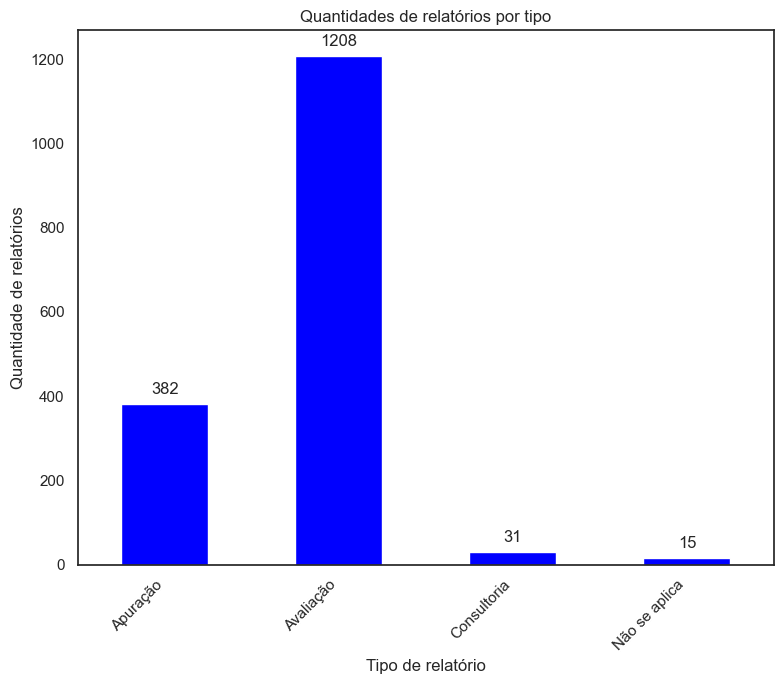

In [7]:
#Selecionando os dados que serão apresentados no gráfico
grafico_tipo_relatorio = tabela_tipo_relatorio.groupby('Tipo do Relatório')['Quantidade de relatórios'].mean()

#decidindo o tamanho do gráfico
plt.figure(figsize=(8, 7))

#ajustando o modelo do gráfico, cor das barras, título e nomes dos eixos x e y
ax = grafico_tipo_relatorio.plot(kind='bar', color='blue')

ax.set_xlabel('Tipo de relatório')
ax.set_ylabel('Quantidade de relatórios')
ax.set_title('Quantidades de relatórios por tipo')

#Seleciona a posição que deverá ficar os nomes dos tipos de relatório
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Adiciona acima da barra a quantidade de relatórios que a mesma representa
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
# Salva o gráfico como um arquivo JPEG
plt.savefig('quantidade_relatorios_por_tipo.jpeg', format='jpeg', bbox_inches='tight')
#Exibe o gráfico
plt.show()

### 3. Casos por Ano do Relatório

In [8]:
tabela_relatorios_2021_bool = tabela_relatorios['Publicação'].str.contains("2021", case=False, na=False) #booleano categoriza apenas quando é do ano de 2021
tabela_relatorios_2021 = tabela_relatorios[tabela_relatorios_2021_bool]
tabela_relatorios_2021_count = len(tabela_relatorios_2021.index)
#display(tabela_relatorios_avaliacao_count)
#display(tabela_relatorios_avaliacao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2022_bool = tabela_relatorios['Publicação'].str.contains("2022", case=False, na=False) #booleano categoriza apenas quando é do ano de 2022
tabela_relatorios_2022 = tabela_relatorios[tabela_relatorios_2022_bool]
tabela_relatorios_2022_count = len(tabela_relatorios_2022.index)
#display(tabela_relatorios_consultoria_count)
#display(tabela_relatorios_consultoria.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2023_bool = tabela_relatorios['Publicação'].str.contains("2023", case=False, na=False) #booleano categoriza apenas quando é do ano de 2023
tabela_relatorios_2023 = tabela_relatorios[tabela_relatorios_2023_bool]
tabela_relatorios_2023_count = len(tabela_relatorios_2023.index)
#display(tabela_relatorios_apuracao_count)
#display(tabela_relatorios_apuracao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

tabela_relatorios_2024_bool = tabela_relatorios['Publicação'].str.contains("2024", case=False, na=False) #booleano categoriza apenas quando é do ano de 2024
tabela_relatorios_2024 = tabela_relatorios[tabela_relatorios_2024_bool]
tabela_relatorios_2024_count = len(tabela_relatorios_2024.index)
#display(tabela_relatorios_apuracao_count)
#display(tabela_relatorios_apuracao.head(10)) #Exibe amostra da tabela para saber se está tudo ok

#Quantidade de relatórios por ano, respectivamente
array_quantidades_anos = [tabela_relatorios_2021_count, tabela_relatorios_2022_count, tabela_relatorios_2023_count, tabela_relatorios_2024_count]
#Anos respectivos de relatório
array_ano_relatorio = ['2021', '2022', '2023', '2024']
#Porcentagens por ano de relatório
array_porcentagens_anos_relatorios = [round(((tabela_relatorios_2021_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_2022_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_2023_count/qtd_total_relatórios)*100), 2), round(((tabela_relatorios_2024_count/qtd_total_relatórios)*100), 2)]

#Tabela com as quantidades e anos de relatórios
tabela_ano_relatorio = pd.DataFrame({'Ano do relatório': array_ano_relatorio, 'Quantidade de relatórios': array_quantidades_anos, 'Porcentagem (%)': array_porcentagens_anos_relatorios})

tabela_ano_relatorio.to_excel('casos_por_ano.xlsx')

#Desenha a tabela
display(tabela_ano_relatorio)

,Ano do relatório,Quantidade de relatórios,Porcentagem (%)
0,2021,319,19.50
1,2022,537,32.82
2,2023,522,31.91
3,2024,258,15.77


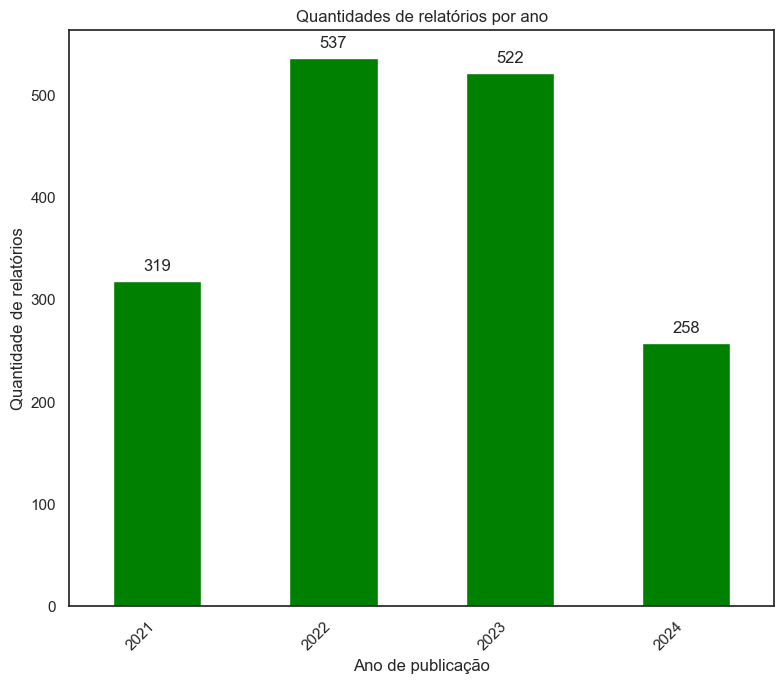

In [9]:
#Selecionando os dados que serão apresentados no gráfico
grafico_ano_relatorio = tabela_ano_relatorio.groupby('Ano do relatório')['Quantidade de relatórios'].mean()

#decidindo o tamanho do gráfico
plt.figure(figsize=(8, 7))

#ajustando o modelo do gráfico, cor das barras, título e nomes dos eixos x e y
ax = grafico_ano_relatorio.plot(kind='bar', color='green')
ax.set_xlabel('Ano de publicação')
ax.set_ylabel('Quantidade de relatórios')
ax.set_title('Quantidades de relatórios por ano')

#Seleciona a posição que deverá ficar os anos dos relatório
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Adiciona acima da barra a quantidade de relatórios que a mesma representa
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
# Salva o gráfico como um arquivo JPEG
plt.savefig('quantidade_relatorios_por_ano.jpeg', format='jpeg', bbox_inches='tight')

#Exibe o gráfico
plt.show()

### 4. Critérios por estado

In [10]:
array_criterios = ["Matriz", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]

def porcentagem_criterios_estado(tabela_relatorios_estado):
    
    qtd_relatorios_estado = len(tabela_relatorios_estado.index)
    porcentagens_por_criterio = pd.Series(index=array_criterios, dtype='float64')
    
    #Quantidade do critério matriz de achados
    tabela_criterio_matriz_bool = tabela_relatorios_estado["Matriz de Achados?"]==1
    tabela_criterio_matriz = tabela_relatorios_estado[tabela_criterio_matriz_bool]
    criterio_matriz_count = len(tabela_criterio_matriz.index)
    porcentagem_criterio_matriz = round(((criterio_matriz_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["Matriz"] = porcentagem_criterio_matriz

    #Quantidade do critério questões auditoria
    tabela_criterio_questoes_auditoria_bool = tabela_relatorios_estado["a. Questões de Auditoria"]==1
    tabela_criterio_questoes_auditoria = tabela_relatorios_estado[tabela_criterio_questoes_auditoria_bool]
    criterio_questoes_auditoria_count = len(tabela_criterio_questoes_auditoria.index)
    porcentagem_criterio_questoes_auditoria = round(((criterio_questoes_auditoria_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["A"] = porcentagem_criterio_questoes_auditoria

    #Quantidade do critério subquestões auditoria
    tabela_criterio_subquestoes_auditoria_bool = tabela_relatorios_estado["b. Subquestões de Auditoria"]==1
    tabela_criterio_subquestoes_auditoria = tabela_relatorios_estado[tabela_criterio_subquestoes_auditoria_bool]
    criterio_subquestoes_auditoria_count = len(tabela_criterio_subquestoes_auditoria.index)
    porcentagem_criterio_subquestoes_auditoria = round(((criterio_subquestoes_auditoria_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["B"] = porcentagem_criterio_subquestoes_auditoria

    #Quantidade do critério c. Descrição sumária
    tabela_criterio_descricao_sumaria_bool = tabela_relatorios_estado["c. Descrição sumária"]==1
    tabela_criterio_descricao_sumaria = tabela_relatorios_estado[tabela_criterio_descricao_sumaria_bool]
    criterio_descricao_sumaria_count = len(tabela_criterio_descricao_sumaria.index)
    porcentagem_criterio_descricao_sumaria = round(((criterio_descricao_sumaria_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["C"] = porcentagem_criterio_descricao_sumaria

    #Quantidade do critério d. Critério (O que deveria ser)
    tabela_criterio_deveria_ser_bool = tabela_relatorios_estado["d. Critério (O que deveria ser)"]==1
    tabela_criterio_deveria_ser = tabela_relatorios_estado[tabela_criterio_deveria_ser_bool]
    criterio_deveria_ser_count = len(tabela_criterio_deveria_ser.index)
    porcentagem_criterio_deveria_ser = round(((criterio_deveria_ser_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["D"] = porcentagem_criterio_deveria_ser

    #Quantidade do critério e. Condição ou situação encontrada (O que é) [achados]
    tabela_criterio_achados_bool = tabela_relatorios_estado["e. Condição ou situação encontrada (O que é) [achados]"]==1
    tabela_criterio_achados = tabela_relatorios_estado[tabela_criterio_achados_bool]
    criterio_achados_count = len(tabela_criterio_achados.index)
    porcentagem_criterio_achados = round(((criterio_achados_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["E"] = porcentagem_criterio_achados

    #Quantidade do critério f. Evidências
    tabela_criterio_evidencias_bool = tabela_relatorios_estado["f. Evidências"]==1
    tabela_criterio_evidencias = tabela_relatorios_estado[tabela_criterio_evidencias_bool]
    criterio_evidencias_count = len(tabela_criterio_evidencias.index)
    porcentagem_criterio_evidencias = round(((criterio_evidencias_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["F"] = porcentagem_criterio_evidencias

    #Quantidade do critério g. Informação extraída das evidências
    tabela_criterio_info_evidencias_bool = tabela_relatorios_estado["g. Informação extraída das evidências"]==1
    tabela_criterio_info_evidencias = tabela_relatorios_estado[tabela_criterio_info_evidencias_bool]
    criterio_info_evidencias_count = len(tabela_criterio_info_evidencias.index)
    porcentagem_criterio_info_evidencias= round(((criterio_info_evidencias_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["G"] = porcentagem_criterio_info_evidencias
    
    #Quantidade do critério h. Causas
    tabela_criterio_causas_bool = tabela_relatorios_estado["h. Causas"]==1
    tabela_criterio_causas = tabela_relatorios_estado[tabela_criterio_causas_bool]
    criterio_causas_count = len(tabela_criterio_causas.index)
    porcentagem_criterio_causas = round(((criterio_causas_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["H"] = porcentagem_criterio_causas

    #Quantidade do critério i. Efeitos
    tabela_criterio_efeitos_bool = tabela_relatorios_estado["i. Efeitos"]==1
    tabela_criterio_efeitos = tabela_relatorios_estado[tabela_criterio_efeitos_bool]
    criterio_efeitos_count = len(tabela_criterio_efeitos.index)
    porcentagem_criterio_efeitos = round(((criterio_efeitos_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["I"] = porcentagem_criterio_efeitos

    #Quantidade do critério j. Boas Práticas
    tabela_criterio_boas_praticas_bool = tabela_relatorios_estado["j. Boas Práticas"]==1
    tabela_criterio_boas_praticas = tabela_relatorios_estado[tabela_criterio_boas_praticas_bool]
    criterio_boas_praticas_count = len(tabela_criterio_boas_praticas.index)
    porcentagem_criterio_boas_praticas = round(((criterio_boas_praticas_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["J"] = porcentagem_criterio_boas_praticas

    #Quantidade do critério k. Recomendações
    tabela_criterio_recomendacoes_bool = tabela_relatorios_estado["k. Recomendações"]==1
    tabela_criterio_recomendacoes = tabela_relatorios_estado[tabela_criterio_recomendacoes_bool]
    criterio_recomendacoes_count = len(tabela_criterio_recomendacoes.index)
    porcentagem_criterio_recomendacoes = round(((criterio_recomendacoes_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["K"] = porcentagem_criterio_recomendacoes

    #Quantidade do critério l. Benefícios esperados
    tabela_criterio_beneficios_bool = tabela_relatorios_estado["l. Benefícios esperados"]==1
    tabela_criterio_beneficios = tabela_relatorios_estado[tabela_criterio_beneficios_bool]
    criterio_beneficios_count = len(tabela_criterio_beneficios.index)
    porcentagem_criterio_beneficios = round(((criterio_beneficios_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["L"] = porcentagem_criterio_beneficios

    #Quantidade do critério m. Manifestação
    tabela_criterio_manifestacao_bool = tabela_relatorios_estado["m. Manifestação"]==1
    tabela_criterio_manifestacao = tabela_relatorios_estado[tabela_criterio_manifestacao_bool]
    criterio_manifestacao_count = len(tabela_criterio_manifestacao.index)
    porcentagem_criterio_manifestacao = round(((criterio_manifestacao_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["M"] = porcentagem_criterio_manifestacao

    #Quantidade do critério n. Conclusões
    tabela_criterio_conclusoes_bool = tabela_relatorios_estado["n. Conclusões"]==1
    tabela_criterio_conclusoes = tabela_relatorios_estado[tabela_criterio_conclusoes_bool]
    criterio_conclusoes_count = len(tabela_criterio_conclusoes.index)
    porcentagem_criterio_conclusoes = round(((criterio_conclusoes_count/qtd_relatorios_estado)*100), 2)
    porcentagens_por_criterio["N"] = porcentagem_criterio_conclusoes

    return porcentagens_por_criterio

array_tabelas_estados = [tabela_acre, tabela_alagoas, tabela_amazonas, tabela_amapa, tabela_bahia, tabela_ceara, tabela_df, tabela_es, tabela_goias, tabela_maranhao, tabela_mg, tabela_ms, tabela_mt, tabela_para, tabela_paraiba, tabela_pernambuco, tabela_piaui, tabela_parana, tabela_rj, tabela_rn, tabela_rs, tabela_rondonia, tabela_roraima, tabela_sc, tabela_sergipe, tabela_sp, tabela_tocantins]

porcentagem_criterios_estado_aux = []

for i in array_tabelas_estados:
    porcentagem_criterios_estado_aux.append(porcentagem_criterios_estado(i)) #Roda para todos os estados e adiciona à tabela auxiliar de porcentagem dos critérios

porcentagem_criterios_estado_aux.append(porcentagem_criterios_estado(tabela_relatorios))
indice = array_estados
indice.extend(["Total"])
porcentagens_criterios_por_estado = pd.DataFrame(porcentagem_criterios_estado_aux, index=array_estados)
porcentagens_criterios_por_estado.to_excel('criterios_por_estado.xlsx')


display(porcentagens_criterios_por_estado.reset_index(names="Estados"))

,Estados,Matriz,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,Acre,0.00,41.18,5.88,100.00,88.24,94.12,100.0,11.76,76.47,41.18,11.76,82.35,35.29,35.29,94.12
1,Alagoas,0.00,68.75,25.00,100.00,93.75,87.50,100.0,6.25,56.25,31.25,0.00,75.00,56.25,12.50,100.00
2,Amazonas,0.00,36.36,0.00,100.00,100.00,100.00,100.0,0.00,54.55,27.27,0.00,72.73,36.36,18.18,100.00
3,Amapá,0.00,60.00,5.00,100.00,80.00,85.00,100.0,5.00,70.00,55.00,0.00,85.00,25.00,35.00,85.00
4,Bahia,0.00,28.95,7.89,98.68,90.79,97.37,100.0,1.32,57.89,63.16,14.47,67.11,42.11,18.42,88.16
5,Ceará,0.00,42.59,7.41,90.74,87.04,98.15,100.0,9.26,59.26,53.70,18.52,77.78,50.00,29.63,85.19
6,Distrito Federal,0.25,57.29,14.82,98.99,93.47,92.96,100.0,6.53,70.35,59.80,29.65,96.48,59.05,23.12,93.97
7,Espírito Santo,0.00,42.86,9.52,100.00,85.71,90.48,100.0,9.52,42.86,33.33,23.81,71.43,52.38,33.33,90.48
8,Goiás,0.00,86.67,1.67,100.00,75.00,83.33,100.0,5.00,53.33,63.33,10.00,88.33,35.00,18.33,100.00
9,Maranhão,0.00,23.81,0.00,100.00,95.24,85.71,100.0,0.00,38.10,42.86,4.76,71.43,47.62,23.81,80.95


### 5. Criterios por tipo

In [11]:
array_criterios = ["Matriz", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]

def porcentagem_criterios_tipo(tabela_relatorios_tipo):
    
    qtd_relatorios_tipo = len(tabela_relatorios_tipo.index)
    porcentagens_por_criterio = pd.Series(index=array_criterios, dtype='float64')
    
    #Quantidade do critério matriz de achados
    tabela_criterio_matriz_bool = tabela_relatorios_tipo["Matriz de Achados?"]==1
    tabela_criterio_matriz = tabela_relatorios_tipo[tabela_criterio_matriz_bool]
    criterio_matriz_count = len(tabela_criterio_matriz.index)
    porcentagem_criterio_matriz = round(((criterio_matriz_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["Matriz"] = porcentagem_criterio_matriz

    #Quantidade do critério questões auditoria
    tabela_criterio_questoes_auditoria_bool = tabela_relatorios_tipo["a. Questões de Auditoria"]==1
    tabela_criterio_questoes_auditoria = tabela_relatorios_tipo[tabela_criterio_questoes_auditoria_bool]
    criterio_questoes_auditoria_count = len(tabela_criterio_questoes_auditoria.index)
    porcentagem_criterio_questoes_auditoria = round(((criterio_questoes_auditoria_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["A"] = porcentagem_criterio_questoes_auditoria

    #Quantidade do critério subquestões auditoria
    tabela_criterio_subquestoes_auditoria_bool = tabela_relatorios_tipo["b. Subquestões de Auditoria"]==1
    tabela_criterio_subquestoes_auditoria = tabela_relatorios_tipo[tabela_criterio_subquestoes_auditoria_bool]
    criterio_subquestoes_auditoria_count = len(tabela_criterio_subquestoes_auditoria.index)
    porcentagem_criterio_subquestoes_auditoria = round(((criterio_subquestoes_auditoria_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["B"] = porcentagem_criterio_subquestoes_auditoria

    #Quantidade do critério c. Descrição sumária
    tabela_criterio_descricao_sumaria_bool = tabela_relatorios_tipo["c. Descrição sumária"]==1
    tabela_criterio_descricao_sumaria = tabela_relatorios_tipo[tabela_criterio_descricao_sumaria_bool]
    criterio_descricao_sumaria_count = len(tabela_criterio_descricao_sumaria.index)
    porcentagem_criterio_descricao_sumaria = round(((criterio_descricao_sumaria_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["C"] = porcentagem_criterio_descricao_sumaria

    #Quantidade do critério d. Critério (O que deveria ser)
    tabela_criterio_deveria_ser_bool = tabela_relatorios_tipo["d. Critério (O que deveria ser)"]==1
    tabela_criterio_deveria_ser = tabela_relatorios_tipo[tabela_criterio_deveria_ser_bool]
    criterio_deveria_ser_count = len(tabela_criterio_deveria_ser.index)
    porcentagem_criterio_deveria_ser = round(((criterio_deveria_ser_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["D"] = porcentagem_criterio_deveria_ser

    #Quantidade do critério e. Condição ou situação encontrada (O que é) [achados]
    tabela_criterio_achados_bool = tabela_relatorios_tipo["e. Condição ou situação encontrada (O que é) [achados]"]==1
    tabela_criterio_achados = tabela_relatorios_tipo[tabela_criterio_achados_bool]
    criterio_achados_count = len(tabela_criterio_achados.index)
    porcentagem_criterio_achados = round(((criterio_achados_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["E"] = porcentagem_criterio_achados

    #Quantidade do critério f. Evidências
    tabela_criterio_evidencias_bool = tabela_relatorios_tipo["f. Evidências"]==1
    tabela_criterio_evidencias = tabela_relatorios_tipo[tabela_criterio_evidencias_bool]
    criterio_evidencias_count = len(tabela_criterio_evidencias.index)
    porcentagem_criterio_evidencias = round(((criterio_evidencias_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["F"] = porcentagem_criterio_evidencias

    #Quantidade do critério g. Informação extraída das evidências
    tabela_criterio_info_evidencias_bool = tabela_relatorios_tipo["g. Informação extraída das evidências"]==1
    tabela_criterio_info_evidencias = tabela_relatorios_tipo[tabela_criterio_info_evidencias_bool]
    criterio_info_evidencias_count = len(tabela_criterio_info_evidencias.index)
    porcentagem_criterio_info_evidencias= round(((criterio_info_evidencias_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["G"] = porcentagem_criterio_info_evidencias
    
    #Quantidade do critério h. Causas
    tabela_criterio_causas_bool = tabela_relatorios_tipo["h. Causas"]==1
    tabela_criterio_causas = tabela_relatorios_tipo[tabela_criterio_causas_bool]
    criterio_causas_count = len(tabela_criterio_causas.index)
    porcentagem_criterio_causas = round(((criterio_causas_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["H"] = porcentagem_criterio_causas

    #Quantidade do critério i. Efeitos
    tabela_criterio_efeitos_bool = tabela_relatorios_tipo["i. Efeitos"]==1
    tabela_criterio_efeitos = tabela_relatorios_tipo[tabela_criterio_efeitos_bool]
    criterio_efeitos_count = len(tabela_criterio_efeitos.index)
    porcentagem_criterio_efeitos = round(((criterio_efeitos_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["I"] = porcentagem_criterio_efeitos

    #Quantidade do critério j. Boas Práticas
    tabela_criterio_boas_praticas_bool = tabela_relatorios_tipo["j. Boas Práticas"]==1
    tabela_criterio_boas_praticas = tabela_relatorios_tipo[tabela_criterio_boas_praticas_bool]
    criterio_boas_praticas_count = len(tabela_criterio_boas_praticas.index)
    porcentagem_criterio_boas_praticas = round(((criterio_boas_praticas_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["J"] = porcentagem_criterio_boas_praticas

    #Quantidade do critério k. Recomendações
    tabela_criterio_recomendacoes_bool = tabela_relatorios_tipo["k. Recomendações"]==1
    tabela_criterio_recomendacoes = tabela_relatorios_tipo[tabela_criterio_recomendacoes_bool]
    criterio_recomendacoes_count = len(tabela_criterio_recomendacoes.index)
    porcentagem_criterio_recomendacoes = round(((criterio_recomendacoes_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["K"] = porcentagem_criterio_recomendacoes

    #Quantidade do critério l. Benefícios esperados
    tabela_criterio_beneficios_bool = tabela_relatorios_tipo["l. Benefícios esperados"]==1
    tabela_criterio_beneficios = tabela_relatorios_tipo[tabela_criterio_beneficios_bool]
    criterio_beneficios_count = len(tabela_criterio_beneficios.index)
    porcentagem_criterio_beneficios = round(((criterio_beneficios_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["L"] = porcentagem_criterio_beneficios

    #Quantidade do critério m. Manifestação
    tabela_criterio_manifestacao_bool = tabela_relatorios_tipo["m. Manifestação"]==1
    tabela_criterio_manifestacao = tabela_relatorios_tipo[tabela_criterio_manifestacao_bool]
    criterio_manifestacao_count = len(tabela_criterio_manifestacao.index)
    porcentagem_criterio_manifestacao = round(((criterio_manifestacao_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["M"] = porcentagem_criterio_manifestacao

    #Quantidade do critério n. Conclusões
    tabela_criterio_conclusoes_bool = tabela_relatorios_tipo["n. Conclusões"]==1
    tabela_criterio_conclusoes = tabela_relatorios_tipo[tabela_criterio_conclusoes_bool]
    criterio_conclusoes_count = len(tabela_criterio_conclusoes.index)
    porcentagem_criterio_conclusoes = round(((criterio_conclusoes_count/qtd_relatorios_tipo)*100), 2)
    porcentagens_por_criterio["N"] = porcentagem_criterio_conclusoes

    return porcentagens_por_criterio

array_tabelas_tipo = [tabela_relatorios_avaliacao, tabela_relatorios_consultoria, tabela_relatorios_apuracao, tabela_relatorios_nao_se_aplicam]

porcentagem_criterios_tipo_aux = []

for i in array_tabelas_tipo:
    porcentagem_criterios_tipo_aux.append(porcentagem_criterios_tipo(i)) #Roda para todos os estados e adiciona à tabela auxiliar de porcentagem dos critérios


porcentagens_criterios_por_tipo = pd.DataFrame(porcentagem_criterios_tipo_aux, index=array_tipo_relatorio)
porcentagens_criterios_por_tipo.to_excel('criterios_por_tipo.xlsx')


display(porcentagens_criterios_por_tipo.reset_index(names="Tipo de Relatório"))

,Tipo de Relatório,Matriz,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,Avaliação,0.41,62.33,12.25,99.09,85.26,86.01,100.0,4.80,57.86,51.74,19.29,87.09,47.27,18.79,94.95
1,Consultoria,0.00,6.45,0.00,100.00,100.00,100.00,100.0,6.45,80.65,64.52,38.71,87.10,77.42,25.81,87.10
2,Apuração,0.00,45.81,4.71,98.43,75.13,96.07,100.0,6.81,57.07,59.16,6.54,69.11,29.06,20.68,85.34
3,Não se aplica,0.00,13.33,0.00,100.00,46.67,93.33,100.0,0.00,13.33,20.00,0.00,20.00,0.00,6.67,80.00


### 6. Critérios por Ano 

In [12]:
array_criterios = ["Matriz", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]

def porcentagem_criterios_ano(tabela_relatorios_ano):
    
    qtd_relatorios_ano = len(tabela_relatorios_ano.index)
    porcentagens_por_criterio = pd.Series(index=array_criterios, dtype='float64')
    
    #Quantidade do critério matriz de achados
    tabela_criterio_matriz_bool = tabela_relatorios_ano["Matriz de Achados?"]==1
    tabela_criterio_matriz = tabela_relatorios_ano[tabela_criterio_matriz_bool]
    criterio_matriz_count = len(tabela_criterio_matriz.index)
    porcentagem_criterio_matriz = round(((criterio_matriz_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["Matriz"] = porcentagem_criterio_matriz

    #Quantidade do critério questões auditoria
    tabela_criterio_questoes_auditoria_bool = tabela_relatorios_ano["a. Questões de Auditoria"]==1
    tabela_criterio_questoes_auditoria = tabela_relatorios_ano[tabela_criterio_questoes_auditoria_bool]
    criterio_questoes_auditoria_count = len(tabela_criterio_questoes_auditoria.index)
    porcentagem_criterio_questoes_auditoria = round(((criterio_questoes_auditoria_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["A"] = porcentagem_criterio_questoes_auditoria

    #Quantidade do critério subquestões auditoria
    tabela_criterio_subquestoes_auditoria_bool = tabela_relatorios_ano["b. Subquestões de Auditoria"]==1
    tabela_criterio_subquestoes_auditoria = tabela_relatorios_ano[tabela_criterio_subquestoes_auditoria_bool]
    criterio_subquestoes_auditoria_count = len(tabela_criterio_subquestoes_auditoria.index)
    porcentagem_criterio_subquestoes_auditoria = round(((criterio_subquestoes_auditoria_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["B"] = porcentagem_criterio_subquestoes_auditoria

    #Quantidade do critério c. Descrição sumária
    tabela_criterio_descricao_sumaria_bool = tabela_relatorios_ano["c. Descrição sumária"]==1
    tabela_criterio_descricao_sumaria = tabela_relatorios_ano[tabela_criterio_descricao_sumaria_bool]
    criterio_descricao_sumaria_count = len(tabela_criterio_descricao_sumaria.index)
    porcentagem_criterio_descricao_sumaria = round(((criterio_descricao_sumaria_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["C"] = porcentagem_criterio_descricao_sumaria

    #Quantidade do critério d. Critério (O que deveria ser)
    tabela_criterio_deveria_ser_bool = tabela_relatorios_ano["d. Critério (O que deveria ser)"]==1
    tabela_criterio_deveria_ser = tabela_relatorios_ano[tabela_criterio_deveria_ser_bool]
    criterio_deveria_ser_count = len(tabela_criterio_deveria_ser.index)
    porcentagem_criterio_deveria_ser = round(((criterio_deveria_ser_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["D"] = porcentagem_criterio_deveria_ser

    #Quantidade do critério e. Condição ou situação encontrada (O que é) [achados]
    tabela_criterio_achados_bool = tabela_relatorios_ano["e. Condição ou situação encontrada (O que é) [achados]"]==1
    tabela_criterio_achados = tabela_relatorios_ano[tabela_criterio_achados_bool]
    criterio_achados_count = len(tabela_criterio_achados.index)
    porcentagem_criterio_achados = round(((criterio_achados_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["E"] = porcentagem_criterio_achados

    #Quantidade do critério f. Evidências
    tabela_criterio_evidencias_bool = tabela_relatorios_ano["f. Evidências"]==1
    tabela_criterio_evidencias = tabela_relatorios_ano[tabela_criterio_evidencias_bool]
    criterio_evidencias_count = len(tabela_criterio_evidencias.index)
    porcentagem_criterio_evidencias = round(((criterio_evidencias_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["F"] = porcentagem_criterio_evidencias

    #Quantidade do critério g. Informação extraída das evidências
    tabela_criterio_info_evidencias_bool = tabela_relatorios_ano["g. Informação extraída das evidências"]==1
    tabela_criterio_info_evidencias = tabela_relatorios_ano[tabela_criterio_info_evidencias_bool]
    criterio_info_evidencias_count = len(tabela_criterio_info_evidencias.index)
    porcentagem_criterio_info_evidencias= round(((criterio_info_evidencias_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["G"] = porcentagem_criterio_info_evidencias
    
    #Quantidade do critério h. Causas
    tabela_criterio_causas_bool = tabela_relatorios_ano["h. Causas"]==1
    tabela_criterio_causas = tabela_relatorios_ano[tabela_criterio_causas_bool]
    criterio_causas_count = len(tabela_criterio_causas.index)
    porcentagem_criterio_causas = round(((criterio_causas_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["H"] = porcentagem_criterio_causas

    #Quantidade do critério i. Efeitos
    tabela_criterio_efeitos_bool = tabela_relatorios_ano["i. Efeitos"]==1
    tabela_criterio_efeitos = tabela_relatorios_ano[tabela_criterio_efeitos_bool]
    criterio_efeitos_count = len(tabela_criterio_efeitos.index)
    porcentagem_criterio_efeitos = round(((criterio_efeitos_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["I"] = porcentagem_criterio_efeitos

    #Quantidade do critério j. Boas Práticas
    tabela_criterio_boas_praticas_bool = tabela_relatorios_ano["j. Boas Práticas"]==1
    tabela_criterio_boas_praticas = tabela_relatorios_ano[tabela_criterio_boas_praticas_bool]
    criterio_boas_praticas_count = len(tabela_criterio_boas_praticas.index)
    porcentagem_criterio_boas_praticas = round(((criterio_boas_praticas_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["J"] = porcentagem_criterio_boas_praticas

    #Quantidade do critério k. Recomendações
    tabela_criterio_recomendacoes_bool = tabela_relatorios_ano["k. Recomendações"]==1
    tabela_criterio_recomendacoes = tabela_relatorios_ano[tabela_criterio_recomendacoes_bool]
    criterio_recomendacoes_count = len(tabela_criterio_recomendacoes.index)
    porcentagem_criterio_recomendacoes = round(((criterio_recomendacoes_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["K"] = porcentagem_criterio_recomendacoes

    #Quantidade do critério l. Benefícios esperados
    tabela_criterio_beneficios_bool = tabela_relatorios_ano["l. Benefícios esperados"]==1
    tabela_criterio_beneficios = tabela_relatorios_ano[tabela_criterio_beneficios_bool]
    criterio_beneficios_count = len(tabela_criterio_beneficios.index)
    porcentagem_criterio_beneficios = round(((criterio_beneficios_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["L"] = porcentagem_criterio_beneficios

    #Quantidade do critério m. Manifestação
    tabela_criterio_manifestacao_bool = tabela_relatorios_ano["m. Manifestação"]==1
    tabela_criterio_manifestacao = tabela_relatorios_ano[tabela_criterio_manifestacao_bool]
    criterio_manifestacao_count = len(tabela_criterio_manifestacao.index)
    porcentagem_criterio_manifestacao = round(((criterio_manifestacao_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["M"] = porcentagem_criterio_manifestacao

    #Quantidade do critério n. Conclusões
    tabela_criterio_conclusoes_bool = tabela_relatorios_ano["n. Conclusões"]==1
    tabela_criterio_conclusoes = tabela_relatorios_ano[tabela_criterio_conclusoes_bool]
    criterio_conclusoes_count = len(tabela_criterio_conclusoes.index)
    porcentagem_criterio_conclusoes = round(((criterio_conclusoes_count/qtd_relatorios_ano)*100), 2)
    porcentagens_por_criterio["N"] = porcentagem_criterio_conclusoes

    return porcentagens_por_criterio

array_tabelas_ano = [tabela_relatorios_2021, tabela_relatorios_2022, tabela_relatorios_2023, tabela_relatorios_2024]

porcentagem_criterios_ano_aux = []

for i in array_tabelas_ano:
    porcentagem_criterios_ano_aux.append(porcentagem_criterios_ano(i)) #Roda para todos os anos e adiciona à tabela auxiliar de porcentagem dos critérios


porcentagens_criterios_por_ano = pd.DataFrame(porcentagem_criterios_ano_aux, index=array_ano_relatorio)
porcentagens_criterios_por_ano.to_excel('criterios_por_ano.xlsx')


display(porcentagens_criterios_por_ano.reset_index(names="Ano do Relatório"))

,Ano do Relatório,Matriz,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,2021,0.63,61.44,14.11,99.06,80.56,89.34,100.0,4.08,59.56,57.68,18.81,88.40,38.56,19.44,86.83
1,2022,0.37,62.01,10.06,97.58,83.99,90.69,100.0,6.15,62.57,56.61,16.76,87.90,43.20,18.62,90.13
2,2023,0.19,55.56,10.54,99.81,80.27,88.89,100.0,4.79,52.11,53.07,16.48,79.89,41.00,21.26,95.79
3,2024,0.00,43.80,4.65,100.00,88.37,83.33,100.0,5.81,56.59,42.25,13.18,67.83,53.10,16.28,97.29
